<a href="https://colab.research.google.com/github/Latiefabdul/Data-Science-Project/blob/main/Platform%20Usage%20Analysis%20in%20Online%20Streaming%20Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Platform Usage in Vidio Online Streaming**



## **Main Objectives**

In this project we want to determine from dataset that we use, what is the platform that user keenly use to watch Vidio. We will see explanation based on data about how could we know the platform that user keenly used to watch.

## **Data Collecting**

**Import Library**

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


**Data Input**

In [29]:
from google.colab import drive
drive.mount('/content/drive')

#membuat dataframe kosong
df = pd.DataFrame()
#membaca file CSV dengan ukuran chunksize 1000 baris
for chunk in pd.read_csv('drive/My Drive/vidio_test/vidio10.csv', chunksize=1000,  usecols=range(41)):
    #proses dataframe yang dibaca
    df = df.append(chunk)
  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Validation**

In [30]:
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


In [31]:
#mengetahui fitur atau kolom yang ada pada dataset
df.columns

Index(['hash_content_id', 'hash_play_id', 'hash_visit_id', 'hash_watcher_id',
       'hash_film_id', 'hash_event_id', 'is_login', 'playback_location',
       'platform', 'play_time', 'end_time', 'referrer', 'average_bitrate',
       'bitrate_range', 'total_bytes', 'buffer_duration', 'referrer_group',
       'completed', 'utm_source', 'utm_medium', 'utm_campaign', 'player_name',
       'has_ad', 'flash_version', 'os_name', 'os_version', 'browser_name',
       'browser_version', 'app_name', 'autoplay', 'is_premium', 'app_version',
       'city', 'play_duration', 'content_type', 'stream_type', 'title',
       'category_name', 'film_title', 'season_name', 'genre_name'],
      dtype='object')

In [32]:
#mengetahui ukuran baris dan kolom
df.shape

(742652, 41)

In [33]:
#mengetahui info tentang dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742652 entries, 0 to 742651
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742652 non-null  object 
 1   hash_play_id       742652 non-null  object 
 2   hash_visit_id      742652 non-null  object 
 3   hash_watcher_id    742652 non-null  object 
 4   hash_film_id       40531 non-null   object 
 5   hash_event_id      742652 non-null  object 
 6   is_login           742652 non-null  bool   
 7   playback_location  742652 non-null  object 
 8   platform           742652 non-null  object 
 9   play_time          742652 non-null  object 
 10  end_time           742652 non-null  object 
 11  referrer           702185 non-null  object 
 12  average_bitrate    707564 non-null  float64
 13  bitrate_range      742652 non-null  object 
 14  total_bytes        742652 non-null  int64  
 15  buffer_duration    742652 non-null  float64
 16  re

In [34]:
#function untuk Check Data Quality 
def check_data_quality(input_data):
  #melihat hasil data duplikat dalam bentuk persentase
  duplication = input_data.duplicated().sum()/input_data.shape[0]*100
  print("There are around {:.2f}% of data duplication \n".format(duplication))

  #melihat hasil data null value dalam bentuk persentase
  type_null = pd.DataFrame(input_data.dtypes).T.rename(index = {0: 'Columns Type'})
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
  type_null = type_null.append(pd.DataFrame(input_data.isnull().sum()/input_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
  
  return(type_null.T)

In [35]:
check_data_quality(df)

There are around 0.00% of data duplication 



,Columns Type,Amount of Null Values,Percentage of Null Values
hash_content_id,object,0,0.0
hash_play_id,object,0,0.0
hash_visit_id,object,0,0.0
hash_watcher_id,object,0,0.0
hash_film_id,object,702121,94.542397
hash_event_id,object,0,0.0
is_login,bool,0,0.0
playback_location,object,0,0.0
platform,object,0,0.0
play_time,object,0,0.0


## **Data Cleansing**

In [36]:
#drop kolom yang memiliki null dengan persentase diatas 70%
df.drop(['hash_film_id','utm_source','utm_medium','utm_campaign','city','film_title','season_name','genre_name'], axis=1, inplace=True)


In [37]:
#memasukan dataframe utama(df) ke dalam df_vid yang kemudian akan digunakan selama eksplorasi data dan visualisasi
df_vid=df

## **Exploratory Data Analysis**

### **Univariate Analysis**

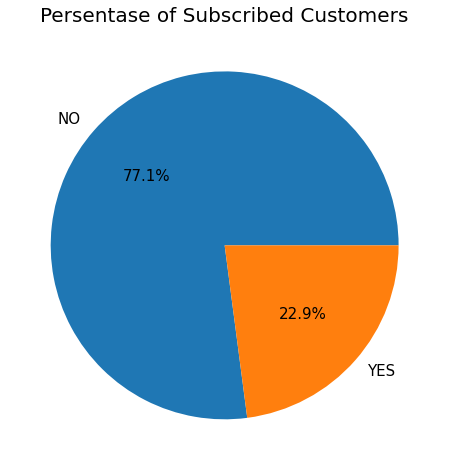

In [38]:
# mengubah nilai True dan False menjadi huruf kapital
df_vid['is_login'] = df_vid['is_login'].apply(str).apply(str.upper)

# mengubah data kolom 'is_login' menjadi "YES" dan "NO"
df_vid['is_login'] = df_vid['is_login'].replace({"TRUE": "YES", "FALSE": "NO"})

# menghitung jumlah "YES" dan "NO" dari kolom 'is_login'
counts = df_vid['is_login'].value_counts()

# membuat objek figure dengan ukuran yang diinginkan
plt.figure(figsize=(10,8))

# menampilkan grafik bar dari hasil hitungan dengan warna yang berbeda
counts.plot(kind='pie', autopct='%1.1f%%', fontsize=15)

# menyembunyikan label pada sumbu y
plt.ylabel(None)
plt.title('Persentase of Subscribed Customers', fontsize=20)
# menampilkan grafik
plt.show()


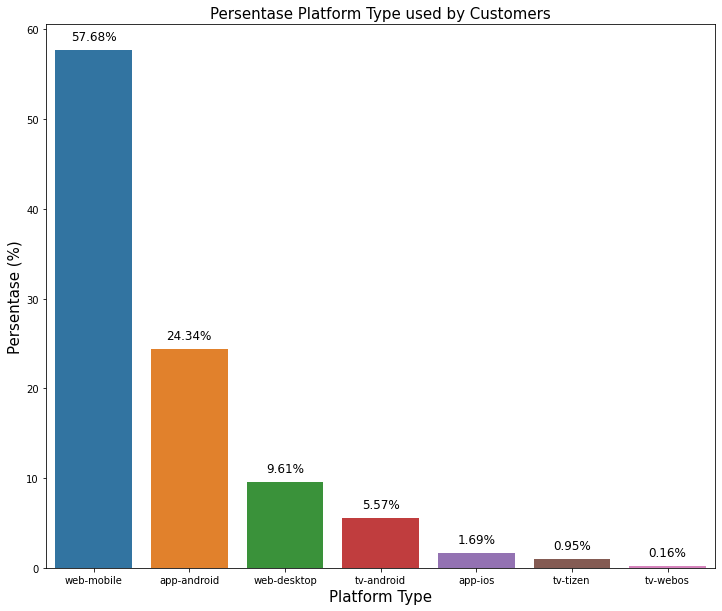

In [39]:
# Hitung persentase fitur dalam kolom platform
platform_count = df_vid['platform'].value_counts()
total = len(df_vid)
platform_percent = platform_count/total*100

# Buat grafik
plt.figure(figsize=(12,10))
sns.barplot(x=platform_percent.index, y=platform_percent.values)

# Tambahkan label dan judul
plt.xlabel('Platform Type', fontsize=15)
plt.ylabel('Persentase (%)', fontsize=15)
plt.title('Persentase Platform Type used by Customers', fontsize=15)

# Tambahkan persentase pada setiap bar
for index, value in enumerate(platform_percent.values):
    plt.annotate("{:.2f}%".format(value), xy=(index, value), xycoords='data',
                 xytext=(0, 10), textcoords='offset points', ha='center', fontsize=12)

# Tampilkan grafik
plt.show()


In [40]:
# convert kolom 'play_duration' menjadi numerical type dan drop baris yang punya nilai non-numeric 
df_vid = df_vid[pd.to_numeric(df_vid['play_duration'], errors='coerce').notnull()]


In [41]:
# convert kolom 'play_duration' menjadi numerical type dan drop baris yang punya nilai non-numeric 
df_vid['play_duration'] = pd.to_numeric(df_vid['play_duration'], errors='coerce')

<ipython-input-41-0c4ca49010f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vid['play_duration'] = pd.to_numeric(df_vid['play_duration'], errors='coerce')


In [42]:
#Melihat mean ringkas, dispersi, dan bentuk distribusi dataset
df_vid['play_duration'].describe()

count    742636.000000
mean        433.046774
std        1651.187623
min           0.000000
25%           3.000000
50%          40.000000
75%         120.000000
max      135075.000000
Name: play_duration, dtype: float64

In [43]:
df_vid = df_vid.copy()
df_vid['play_duration'] = df_vid['play_duration'].astype(int)
# Membuat rata-rata waktu yang dihabiskan pelanggan untuk menonton
mean_duration = df_vid['play_duration'].mean()
# Membuat range dengan menggunakan rata-rata
bins = [0, mean_duration, df_vid['play_duration'].max()]
label = ['below average','above average']
df_vid['duration_range'] = pd.cut(df_vid['play_duration'], bins, labels=label)

Text(0, 0.5, 'Play Duration')

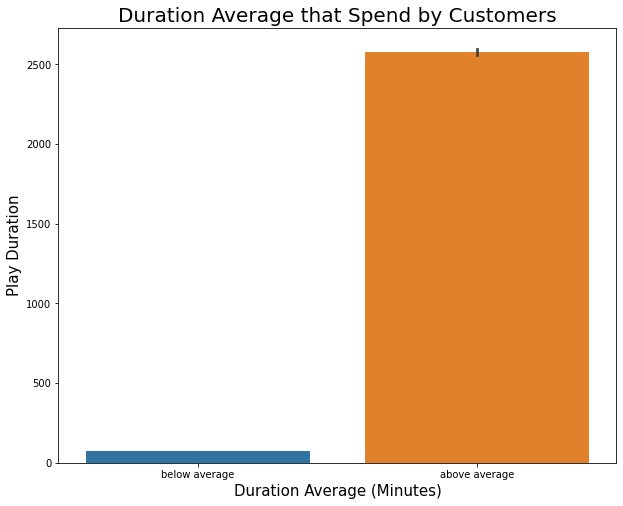

In [44]:
# Membuat grafik duration average
plt.figure(figsize=(10,8)) # membuat ukuran fig size (8,6)
plt.title('Duration Average that Spend by Customers', fontsize=20)
sns.barplot(x = "duration_range", y = "play_duration", data = df_vid)
plt.xlabel('Duration Average (Minutes)', fontsize=15)
plt.ylabel('Play Duration', fontsize=15)

Ada beberapa alasan mengapa durasi waktu nonton di platform streaming online dapat dibaca lebih dari 24 jam:

1. Pencatatan waktu yang salah: Platform streaming online mungkin mencatat waktu mulai dan selesai nonton secara otomatis, tetapi jika ada kesalahan dalam sistem, waktu mulai dan selesai dapat salah, sehingga menghasilkan durasi yang lebih lama dari seharusnya.

2. Pause atau buffering: Penonton mungkin meng pause atau buffering siaran, sehingga waktu yang diambil untuk pause atau buffering juga dihitung sebagai waktu nonton.

3. Multi-device : Penonton mungkin menonton di beberapa perangkat sekaligus, sehingga durasi waktu nonton dari masing-masing perangkat dijumlahkan.

4. Multi-Account : Penonton mungkin memiliki lebih dari satu akun dan menonton di akun yang berbeda sehingga durasi waktu nonton dari masing-masing akun dijumlahkan.

5. Bug sistem : mungkin terjadi bug dalam sistem yang menyebabkan durasi waktu nonton di catat lebih lama dari seharusnya.

6. Penonton berlangganan : Penonton berlangganan mungkin memiliki akses ke konten yang lebih luas dan dapat menonton konten selama lebih dari 24 jam.

7. Penonton menonton beberapa kali : Penonton mungkin menonton konten yang sama beberapa kali dalam periode waktu yang berbeda sehingga durasi waktu nonton dijumlahkan.

Itu hanyalah beberapa alasan yang mungkin menyebabkan durasi waktu nonton di platform streaming online dibaca lebih dari 24 jam. Untuk mengetahui alasan pasti, perlu untuk mengecek sistem dan data yang tersedia dari platform streaming online.

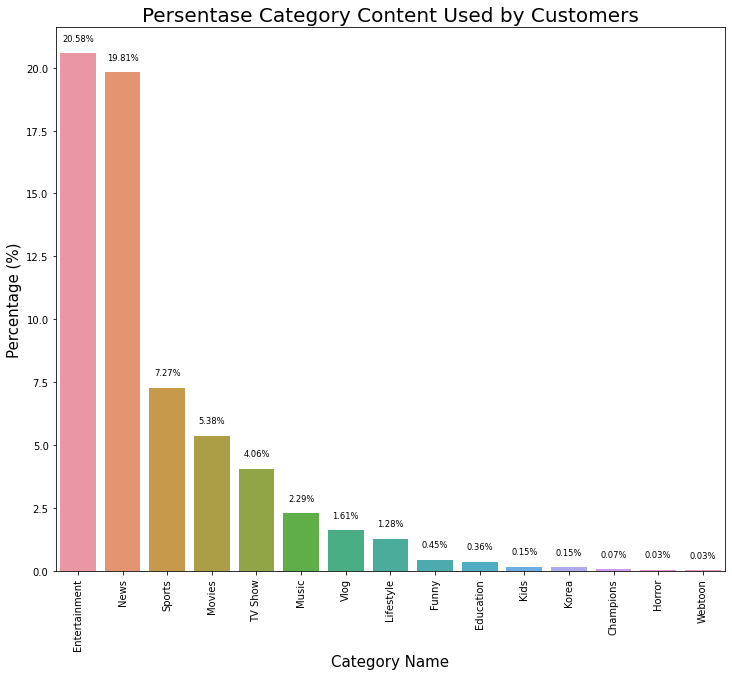

In [45]:
# Menghitung jumlah dari setiap kategori
category_counts = df_vid['category_name'].value_counts()

# Mengambil 15 kategori teratas
top_15_categories = category_counts.head(15)

# Menghitung total jumlah baris dalam dataframe
total_rows = df_vid.shape[0]

# Menghitung persentase dari setiap kategori
category_percentages = (top_15_categories / total_rows) * 100

# Menampilkan grafik
plt.figure(figsize=(12,10))
ax = sns.barplot(x=category_percentages.index, y=category_percentages.values)
plt.xlabel('Category Name', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.xticks(rotation=90)
plt.title('Persentase Category Content Used by Customers', fontsize=20)

# Menambahkan label persentase di atas setiap batang
for i in range(len(category_percentages)):
    ax.text(i, category_percentages[i] + 0.5, str(round(category_percentages[i], 2)) + "%", horizontalalignment='center', size='small', color='black')

plt.show()



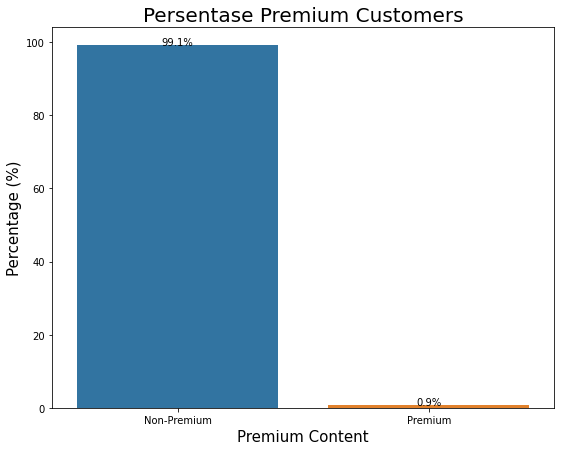

In [46]:
# mengubah nilai True dan False menjadi huruf kapital
df_vid['is_premium'] = df_vid['is_premium'].apply(str).apply(str.upper)

# mengubah data kolom 'is_premium' menjadi "Premium" dan "Non-Premium"
df_vid['is_premium'] = df_vid['is_premium'].replace({"TRUE": "Premium", "FALSE": "Non-Premium"})

#menghitung jumlah "TRUE" & "FALSE" pada kolom is_premium dan mengubahnya dalam bentuk persen
is_premium_counts = df_vid['is_premium'].value_counts()
is_premium_percent = is_premium_counts.apply(lambda x: x/len(df_vid)*100)

#Membuat grafik dari persentase is_premium
plt.figure(figsize=(9,7))
sns.barplot(x = is_premium_percent.index, y=is_premium_percent.values)

for i in range(len(is_premium_percent)):
    count = is_premium_percent.values[i]
    pct_string = '{:0.1f}%'.format(count)
    plt.text(i, count, pct_string, color='black', ha='center')

plt.xlabel('Premium Content', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Persentase Premium Customers', fontsize=20)
plt.show()

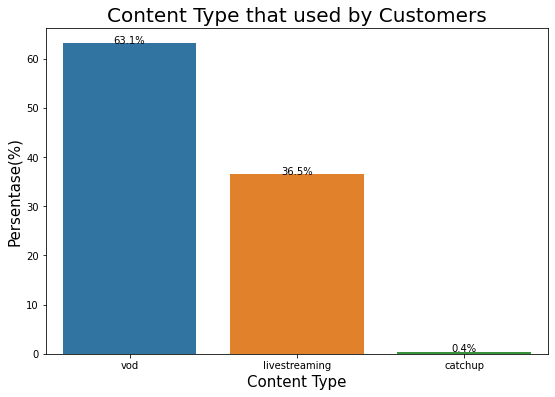

In [47]:
#menghitung jumlah masing-masing fitur content type pada kolom content_type dan mengubahnya dalam bentuk persen
content_type_counts = df_vid['content_type'].value_counts()
content_type_percent = content_type_counts.apply(lambda x: x/len(df_vid)*100)

#Membuat grafik dari persentase content type
plt.figure(figsize=(9,6))
sns.barplot(x = content_type_percent.index, y=content_type_percent.values)

for i in range(len(content_type_percent)):
    count = content_type_percent.values[i]
    pct_string = '{:0.1f}%'.format(count)
    plt.text(i, count, pct_string, color='black', ha='center')

plt.ylabel('Persentase(%)', fontsize=15)
plt.xlabel('Content Type', fontsize=15)
plt.title('Content Type that used by Customers', fontsize=20)    
plt.show()

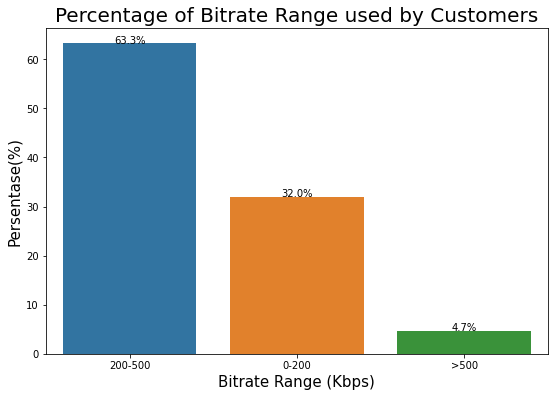

In [48]:
#Mengubah unknown menjadi kategori bitrate range baru
df_vid.replace({'bitrate_range': {'unknown': '>500'}}, inplace=True)

#menghitung jumlah masing-masing fitur content type pada kolom content_type dan mengubahnya dalam bentuk persen
bitrate_range_counts = df_vid['bitrate_range'].value_counts()
bitrate_range_percent = bitrate_range_counts.apply(lambda x: x/len(df_vid)*100)

#Membuat grafik dari persentase content type
plt.figure(figsize=(9,6))
sns.barplot(x = bitrate_range_percent.index, y=bitrate_range_percent.values)

for i in range(len(bitrate_range_percent)):
    count = bitrate_range_percent.values[i]
    pct_string = '{:0.1f}%'.format(count)
    plt.text(i, count, pct_string, color='black', ha='center')

plt.ylabel('Persentase(%)', fontsize=15)
plt.xlabel('Bitrate Range (Kbps)', fontsize=15)
plt.title('Percentage of Bitrate Range used by Customers', fontsize=20)    
plt.show()


### **Multivariate Analysis**

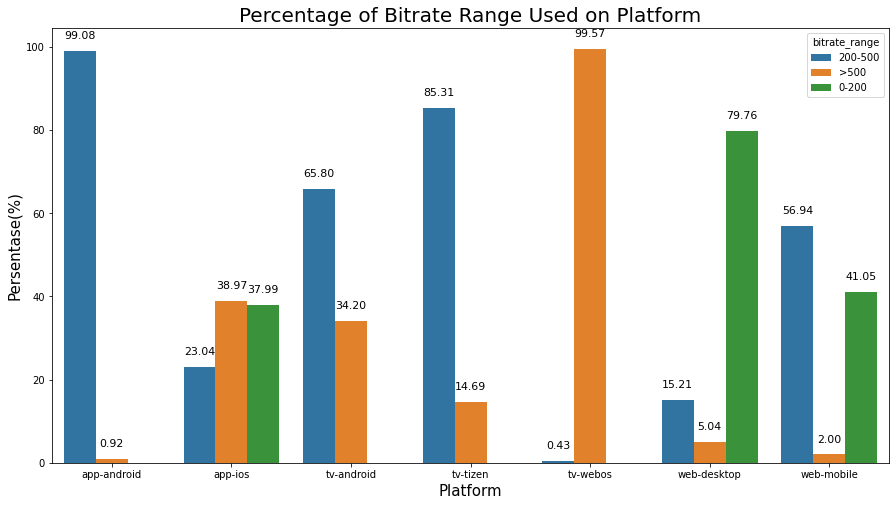

In [49]:
# menghitung jumlah bitrate_range per platform
df_count = df_vid.groupby(['platform', 'bitrate_range']).size().reset_index(name='count')
df_count['percent'] = df_count.groupby(['platform'])['count'].transform(lambda x: x/x.sum()*100)

# menampilkan grafik
plt.figure(figsize=(15,8))
ax= sns.barplot(x='platform', y='percent', hue='bitrate_range', data=df_count[df_count['percent'].notnull()])

#Menampilkan label persentase disetiap bar
for p in ax.patches:
           ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
                              textcoords='offset points')
           
plt.ylabel('Persentase(%)', fontsize=15)
plt.xlabel('Platform', fontsize=15)
plt.title('Percentage of Bitrate Range Used on Platform', fontsize=20)    
plt.show()

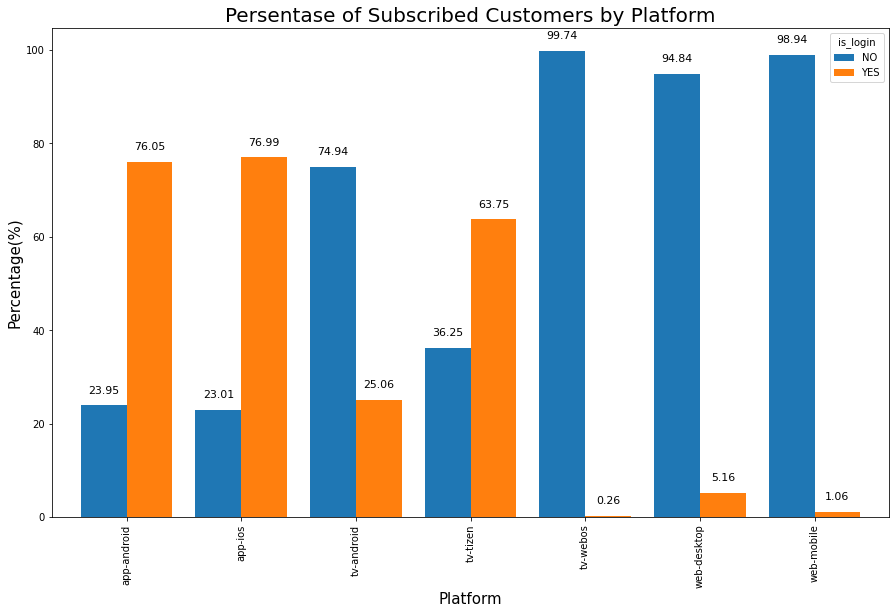

In [50]:
# Create a cross-tabulation table
ctab1 = pd.crosstab(df_vid['platform'], df_vid['is_login'])

# Calculate the percentages of each platform for 'YES' and 'NO' in the 'is_login' column
ctab_percentage1 = ctab1.div(ctab1.sum(1).astype(float), axis=0)
ctab_percentage1 = ctab_percentage1 * 100

# Create a grouped bar chart
ax = ctab_percentage1.plot(kind='bar',width=0.8)

# Set the figure size
plt.gcf().set_size_inches(15,9)

#Menampilkan label persentase disetiap bar
for p in ax.patches:
           ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
                              textcoords='offset points')
           
# Add x-label, y-label, and title
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Percentage(%)', fontsize=15)
plt.title('Persentase of Subscribed Customers by Platform', fontsize=20)

# Show the chart
plt.show()


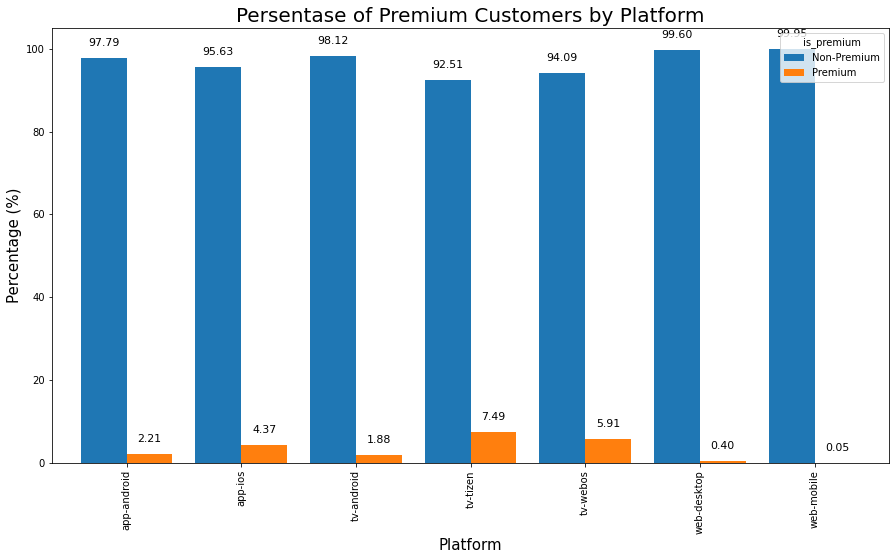

In [51]:
# Create a cross-tabulation table
ctab = pd.crosstab(df_vid['platform'], df_vid['is_premium'])

# Calculate the percentages of each platform for 'YES' and 'NO' in the 'is_premium' column
ctab_percentage = ctab.div(ctab.sum(1).astype(float), axis=0)
ctab_percentage = ctab_percentage * 100

# Create a grouped bar chart
ax = ctab_percentage.plot(kind='bar',width=0.8)

# Set the figure size
plt.gcf().set_size_inches(15,8)

#Menampilkan label persentase disetiap bar
for p in ax.patches:
           ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
                              textcoords='offset points')

# Add x-label, y-label, and title
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Persentase of Premium Customers by Platform', fontsize=20)

# Show the chart
plt.show()


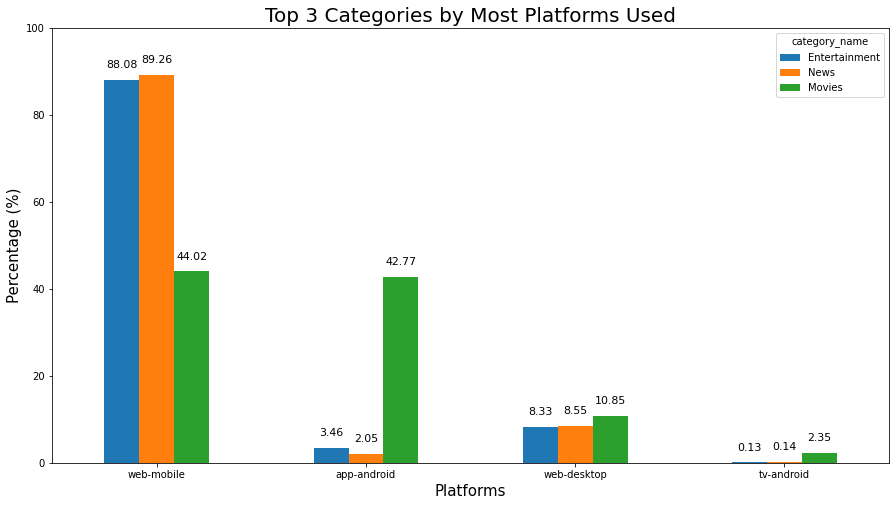

In [52]:
# menghitung jumlah kategori pada setiap platform
platform_counts = df_vid['platform'].value_counts()

# mengambil 3 platform yang paling banyak digunakan
top_platforms = platform_counts.nlargest(4).index
df_filtered = df_vid[df_vid['platform'].isin(top_platforms)]
platform_category_counts = pd.crosstab(df_filtered['platform'], df_filtered['category_name'])

# mengambil 3 category yang paling banyak digunakan pada setiap platform
top_categories = [platform_category_counts.loc[platform].nlargest(3).index for platform in top_platforms]
top_categories = list(set([i for sublist in top_categories for i in sublist]))

# menghitung jumlah kategori pada setiap platform dan kategori yang dipilih
top_categories_counts = pd.concat([platform_category_counts.loc[platform, top_categories[:3]].rename(platform) for platform in top_platforms], axis=1)

# menghitung persentase kategori pada setiap platform
top_categories_percentage = top_categories_counts.div(top_categories_counts.sum(axis=1), axis=0)

# mengalikan persentase dengan 100
top_categories_percentage = top_categories_percentage.mul(100)
top_categories_percentage = top_categories_percentage.T

# membuat grafik barplot tanpa stack
ax = top_categories_percentage.plot(kind='bar', stacked=False, ylim=(0,100))
ax.set_xticklabels(top_categories_percentage.index, rotation=0)

# Set the figure size
plt.gcf().set_size_inches(15,8)

#Menampilkan label persentase disetiap bar
for p in ax.patches:
           ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center', fontsize=11, color='black', xytext=(0, 15),
                              textcoords='offset points')

plt.xlabel('Platforms', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title('Top 3 Categories by Most Platforms Used', fontsize=20)
plt.show()



In [53]:
print(top_categories_percentage)

category_name  Entertainment       News     Movies
web-mobile         88.083703  89.262728  44.015544
app-android         3.456821   2.047335  42.774611
web-desktop         8.331640   8.549634  10.854922
tv-android          0.127836   0.140303   2.354922
